Q1

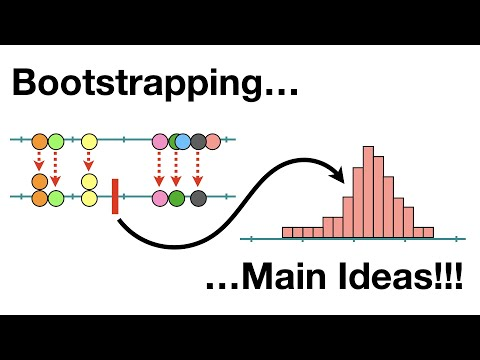

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

The differnence between the standard error of the mean and standard deviation of the original data is that they show the spread of two different types of values. The standard deviaiton of the original data is the spread of the values of data, the standard error of the mean is the spread of the means that were found from the bootstrapped datasets in relation to the one of the original dataset. The latter allows for a prediction of frequencies of different means upon repeating the experiment many times.

Q.2 
We can use the standard error of the mean to create a 95% confidence interval which covers 95% of the bootstrapped means by using this formula: Confidence Interval = Sample Mean ± (1.96 * Standard Error of the Mean), which was provided by the chatbot. This calculation uses the standard error of mean and multiplies it by the z-score, which represents how many standard deviations in either direction is needed to create a confidence interval covering 95% of the means. 

Q.3
To create the 95% confidence interval, we can use np.quantile() to calculate the 2.5th percentile and the 97.5th percentile of the distribution of your bootstrapped means. These will be the upper and lower bounds of the interval.

Q.4

In [ ]:
import numpy as np

# Your sample data
data = np.array([1-10]) 

def bootstrap_ci(data, num_bootstraps=1000, confidence=0.95, statistic=np.mean):
    """
    Calculates a bootstrapped confidence interval for a given statistic.

    Args:
        data (array-like): The original sample data.
        num_bootstraps (int): The number of bootstrap samples to create.
        confidence (float): The desired confidence level (e.g., 0.95 for a 95% CI).
        statistic (function): The statistic to calculate for each bootstrap sample (e.g., np.mean, np.median).

    Returns:
        tuple: The lower and upper bounds of the confidence interval.
    """
    bootstrapped_statistics = []
    for _ in range(num_bootstraps):
        sample = np.random.choice(data, size=len(data), replace=True)  # Resample with replacement
        bootstrapped_statistics.append(statistic(sample))

    lower_bound = np.quantile(bootstrapped_statistics, (1 - confidence) / 2)
    upper_bound = np.quantile(bootstrapped_statistics, 1 - (1 - confidence) / 2)

    return lower_bound, upper_bound

# Calculate the 95% bootstrap CI for the population mean
lower_mean, upper_mean = bootstrap_ci(data, statistic=np.mean)
print(f"95% Bootstrap CI for the Mean: ({lower_mean:.2f}, {upper_mean:.2f})")


To change this code to produce a 95% bootstrap confidence interval for a different population parameter than mean, the code below should be used instead of the one meant for the mean, this way the population median will be calculated and will be used as the upper and lower bounds of the interval.

In [ ]:
# Calculate the 95% bootstrap CI for the population median (change the statistic)
lower_median, upper_median = bootstrap_ci(data, statistic=np.median)
print(f"95% Bootstrap CI for the Median: ({lower_median:.2f}, {upper_median:.2f})")

Q.5
It is important to disinguish between the role of the population parameter and the sample statistic in reference to confidence intervals as the sample statisitcs are assumed outcomes for measuring statistics of a sample and which provide possible values for the population parameter. The sample statistics are needed to find the possible variability of values for the population parameter. 

Q.6
1.
The process of bootstrapping is finding sample population parameters of a dataset by taking sample values from an existing dataset and fiding the parameter for each of these sampled datasets. These give an estimate of possible values for the parameter and their frequencies. 

2.
The main purpose of bootstrapping is to notspend too much time (or money) rerunning the same experiment over and over again, but using existing values to simulate outcomes.

If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
3.
To find if this hypothesized guess is plausible, I could use bootstrapping to find many mean values from bootstrapped samples, and then observe the value which appeared at highest frequency to see whether my estimate was in that scope.

Q.7 
The confidence interval overlapping zero fails to reject the null hypothesis despite the mean statistic itself not being zero as it shows that zero is a possible value for the mean of the population if it were sampled many times (giving a more reliable outcome). What would lead to rejecting the null hypothesis is if zero was not covered by the confidence interval, meaning that it would not be a possible value of the mean. 

Q.8

In [21]:
import pandas as pd
url = "https://raw.githubusercontent.com/Naomisuoft/StatsHW2/refs/heads/main/Untitled%20spreadsheet%20-%20Sheet1.csv"
df = pd.read_csv(url,header=0)
print(df)
#df.isna().sum()

  PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
0                                       1,45,M,84,86      
1                                       2,34,F,78,86      
2                                       3,29,M,83,80      
3                                       4,52,F,81,86      
4                                       5,37,M,81,84      
5                                       6,41,F,80,86      
6                                       7,33,M,79,86      
7                                       8,48,F,85,82      
8                                       9,26,M,76,83      
9                                      10,39,F,83,84      


   PatientID  Age Gender  InitialHealthScore  FinalHealthScore
0          1   45      M                  84                86
1          2   34      F                  78                86
2          3   29      M                  83                80
3          4   52      F                  81                86
4          5   37      M                  81                84


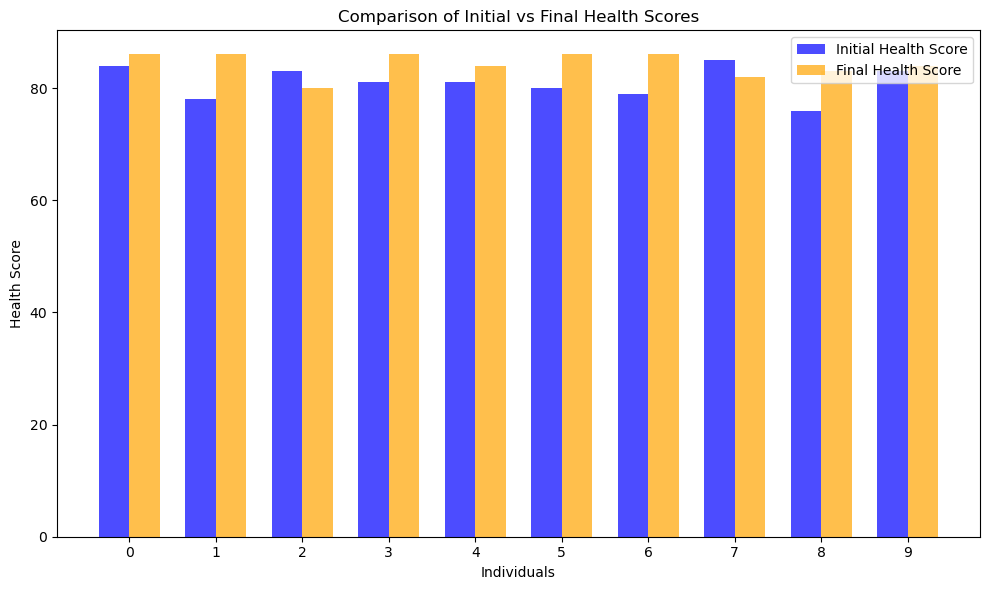

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
url = "https://raw.githubusercontent.com/Naomisuoft/StatsHW2/main/Untitled%20spreadsheet%20-%20Sheet1.csv"
df = pd.read_csv(url, encoding='ISO-8859-1')

# Check the first few rows to identify the correct column names
print(df.head())

# Replace 'Initial Health Score' and 'Final Health Score' with actual column names from your dataset
initial_health_scores = df['InitialHealthScore']  # Update with the correct column name
final_health_scores = df['FinalHealthScore']      # Update with the correct column name

# Create a bar plot to compare initial and final health scores
plt.figure(figsize=(10, 6))
x = range(len(df))  # X-axis positions for each individual

# Bar width
bar_width = 0.35

# Create bars for initial and final health scores
plt.bar(x, initial_health_scores, width=bar_width, label='Initial Health Score', alpha=0.7, color='blue')
plt.bar([p + bar_width for p in x], final_health_scores, width=bar_width, label='Final Health Score', alpha=0.7, color='orange')

# Add labels and title
plt.xlabel('Individuals')
plt.ylabel('Health Score')
plt.title('Comparison of Initial vs Final Health Scores')
plt.xticks([p + bar_width / 2 for p in x], df.index)  # Centering the ticks
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Data Preview:
   PatientID  Age Gender  InitialHealthScore  FinalHealthScore
0          1   45      M                  84                86
1          2   34      F                  78                86
2          3   29      M                  83                80
3          4   52      F                  81                86
4          5   37      M                  81                84

Descriptive Statistics for Initial Health Scores:
count    10.000000
mean     81.000000
std       2.828427
min      76.000000
25%      79.250000
50%      81.000000
75%      83.000000
max      85.000000
Name: InitialHealthScore, dtype: float64

Descriptive Statistics for Final Health Scores:
count    10.000000
mean     84.300000
std       2.110819
min      80.000000
25%      83.250000
50%      85.000000
75%      86.000000
max      86.000000
Name: FinalHealthScore, dtype: float64

Paired T-test Results:
 t-statistic = -2.590, p-value = 0.029
Reject the null hypothesis (H0): significant difference betwe

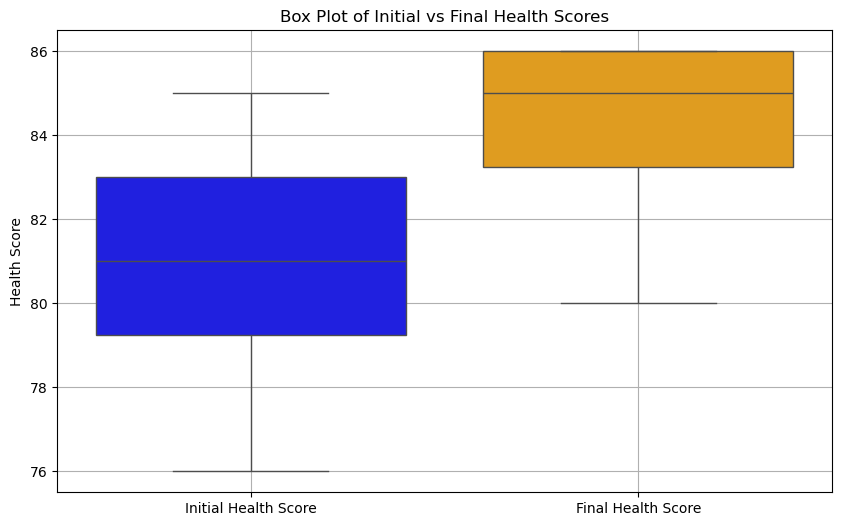

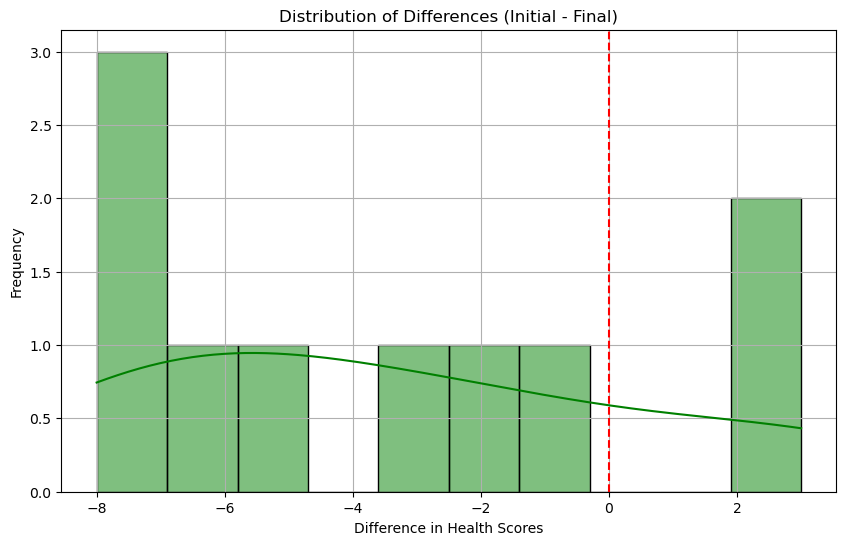

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the CSV file into a pandas DataFrame
url = "https://raw.githubusercontent.com/Naomisuoft/StatsHW2/main/Untitled%20spreadsheet%20-%20Sheet1.csv"
df = pd.read_csv(url, encoding='ISO-8859-1')

# Display the first few rows of the DataFrame to understand its structure
print("Data Preview:")
print(df.head())

# Define the null hypothesis
# Null Hypothesis (H0): There is no significant difference between initial and final health scores.
# Alternative Hypothesis (H1): There is a significant difference between initial and final health scores.

# Extract relevant columns
initial_scores = df['InitialHealthScore'].dropna()  # Ensure to match the actual column names
final_scores = df['FinalHealthScore'].dropna()      # Ensure to match the actual column names

# Check that both arrays are of the same length after dropping NaN values
min_length = min(len(initial_scores), len(final_scores))
initial_scores = initial_scores[:min_length]
final_scores = final_scores[:min_length]

# Descriptive Statistics
print("\nDescriptive Statistics for Initial Health Scores:")
print(initial_scores.describe())
print("\nDescriptive Statistics for Final Health Scores:")
print(final_scores.describe())

# Perform a paired t-test
t_stat, p_value = stats.ttest_rel(initial_scores, final_scores)

# Display results
print(f"\nPaired T-test Results:\n t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

# Set significance level
alpha = 0.05

# Interpret the p-value
if p_value < alpha:
    print("Reject the null hypothesis (H0): significant difference between initial and final health scores.")
else:
    print("Fail to reject the null hypothesis (H0): no significant difference between initial and final health scores.")

# Visualizing Initial vs Final Health Scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=[initial_scores, final_scores], palette=['blue', 'orange'])
plt.xticks([0, 1], ['Initial Health Score', 'Final Health Score'])
plt.title('Box Plot of Initial vs Final Health Scores')
plt.ylabel('Health Score')
plt.grid(True)
plt.show()

# Optional: Visualize the distribution of the differences
differences = initial_scores - final_scores

plt.figure(figsize=(10, 6))
sns.histplot(differences, bins=10, kde=True, color='green')
plt.title('Distribution of Differences (Initial - Final)')
plt.xlabel('Difference in Health Scores')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')  # Line at zero difference
plt.grid(True)
plt.show()

Mean Difference: 3.30
95% Bootstrapped Confidence Interval for the Difference: (0.90, 5.50)


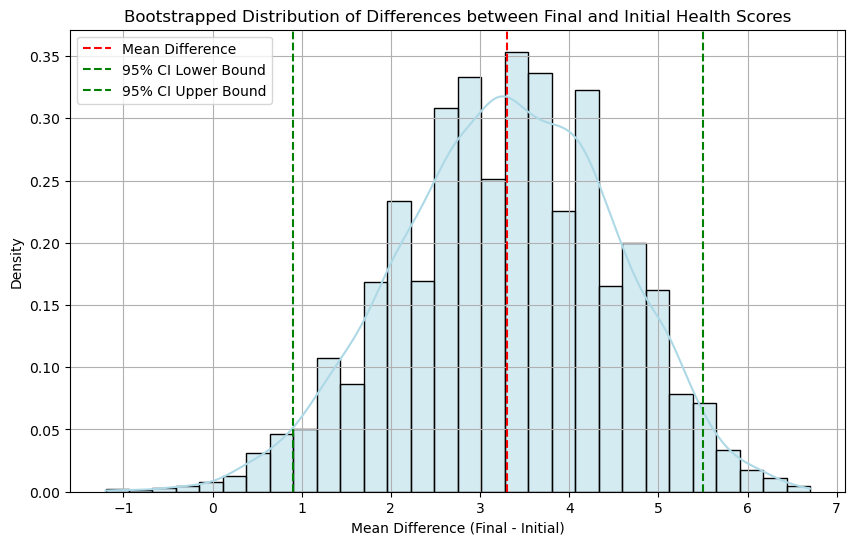

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a pandas DataFrame
url = "https://raw.githubusercontent.com/Naomisuoft/StatsHW2/main/Untitled%20spreadsheet%20-%20Sheet1.csv"
df = pd.read_csv(url, encoding='ISO-8859-1')

# Extract relevant columns
initial_scores = df['InitialHealthScore'].dropna()
final_scores = df['FinalHealthScore'].dropna()

# Ensure both series are of the same length after dropping NaN values
min_length = min(len(initial_scores), len(final_scores))
initial_scores = initial_scores[:min_length]
final_scores = final_scores[:min_length]

# Calculate the differences
differences = final_scores - initial_scores

# Bootstrapping to create confidence interval
num_bootstraps = 10000
bootstrapped_means = []

for _ in range(num_bootstraps):
    # Sample with replacement from differences
    sample = np.random.choice(differences, size=len(differences), replace=True)
    bootstrapped_means.append(np.mean(sample))

# Calculate the 95% confidence interval
lower_bound = np.percentile(bootstrapped_means, 2.5)
upper_bound = np.percentile(bootstrapped_means, 97.5)
mean_diff = np.mean(differences)

# Print the mean difference and confidence interval
print(f"Mean Difference: {mean_diff:.2f}")
print(f"95% Bootstrapped Confidence Interval for the Difference: ({lower_bound:.2f}, {upper_bound:.2f})")

# Create distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(bootstrapped_means, bins=30, kde=True, color='lightblue', stat="density")
plt.axvline(mean_diff, color='red', linestyle='--', label='Mean Difference')
plt.axvline(lower_bound, color='green', linestyle='--', label='95% CI Lower Bound')
plt.axvline(upper_bound, color='green', linestyle='--', label='95% CI Upper Bound')

# Add labels and title
plt.title('Bootstrapped Distribution of Differences between Final and Initial Health Scores')
plt.xlabel('Mean Difference (Final - Initial)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

Upon creating a bootstrapped dataset for this data, I found that the 95% confidence intreval does not cover ), therefore the null hypothesis is rejected. Therefore, this treatment will always have a posititve effect on the patient.